<a href="https://colab.research.google.com/github/dao98765/Do_An_Tot_Ngiep/blob/main/DoAnTotNghiep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bước 1: Import thư viện

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
from matplotlib import pyplot #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from sklearn.preprocessing import LabelEncoder
#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import GRU #GRU
from keras.layers import Bidirectional #Bi_LSTM
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình
from sklearn.metrics import mean_squared_error#đo % sai số tuyệt đối trung bình
import math
from math import sqrt


# Bước 2: Đọc dữ liệu

In [ ]:
#tạo quyền truy cập với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
dataset = pd.read_csv('/content/drive/MyDrive/data/Tatrach.csv')
print(dataset)


                 Ngay  Luong mua Thuong Nhat  Luong mua Khe Tre  Luu luong
0     11/19/2021 0:00                    0.0                0.4   232.6642
1     11/19/2021 1:00                    0.0                0.2   262.1333
2     11/19/2021 2:00                    0.2                0.6   230.5753
3     11/19/2021 3:00                    1.2                0.0   244.1158
4     11/19/2021 4:00                    0.6                0.2   223.8322
...               ...                    ...                ...        ...
8211  10/27/2022 3:00                    0.0                0.0   233.3954
8212  10/27/2022 4:00                    0.0                0.0   244.3335
8213  10/27/2022 5:00                    0.0                0.0   227.9665
8214  10/27/2022 6:00                    0.0                0.0   200.6467
8215  10/27/2022 7:00                    0.0                0.0   222.4860

[8216 rows x 4 columns]


# Bước 3: Mô tả dữ liệu

In [ ]:
#kích thước dữ liệu
dataset.shape

(8216, 4)

In [ ]:
#dữ liệu 5 dòng đầu
dataset.head()

,Ngay,Luong mua Thuong Nhat,Luong mua Khe Tre,Luu luong
0,11/19/2021 0:00,0.0,0.4,232.6642
1,11/19/2021 1:00,0.0,0.2,262.1333
2,11/19/2021 2:00,0.2,0.6,230.5753
3,11/19/2021 3:00,1.2,0.0,244.1158
4,11/19/2021 4:00,0.6,0.2,223.8322


In [ ]:
#xác định kiểu dữ liệu
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ngay                   8214 non-null   object 
 1   Luong mua Thuong Nhat  8214 non-null   float64
 2   Luong mua Khe Tre      8214 non-null   float64
 3   Luu luong              8124 non-null   float64
dtypes: float64(3), object(1)
memory usage: 256.9+ KB


In [ ]:
#mô tả bộ dữ liệu
dataset.describe()

,Luong mua Thuong Nhat,Luong mua Khe Tre,Luu luong
count,8214.000000,8214.000000,8124.000000
mean,0.474945,0.723204,94.899787
std,3.202359,4.359563,284.837432
min,0.000000,0.000000,0.068070
25%,0.000000,0.000000,24.398115
50%,0.000000,0.000000,49.125935
75%,0.000000,0.000000,94.979705
max,91.600000,122.400000,7198.877000


# Bước 4: Tiền xử lý dữ liệu

In [ ]:
# Chuyển đổi cột "Ngày" sang dạng datetime
dataset['Ngay'] = pd.to_datetime(dataset['Ngay'], format='%m/%d/%Y %H:%M')

In [ ]:
#Quan sát bộ dữ liệu và khảo sát giá trị thiếu
nan_count = dataset.isna().sum()
print(nan_count)

Ngay                      2
Luong mua Thuong Nhat     2
Luong mua Khe Tre         2
Luu luong                92
dtype: int64


In [ ]:
#Điền giá trị thiếu
df=dataset.fillna(method="ffill")
nan_count = df.isna().sum()
print(nan_count)

Ngay                     0
Luong mua Thuong Nhat    0
Luong mua Khe Tre        0
Luu luong                0
dtype: int64


(18950.0, 19283.333333333332)

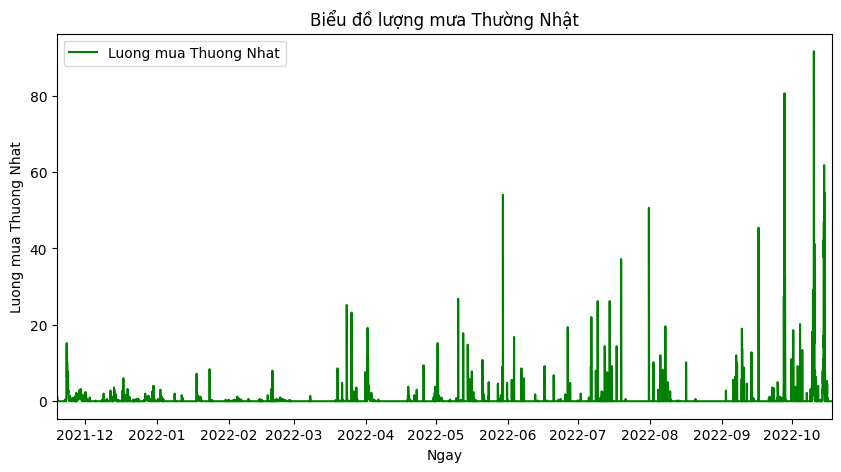

In [ ]:
# Tạo đồ thị lượng mưa Thường nhật
pyplot.figure(figsize=(10, 5))
pyplot.plot(df['Ngay'], df['Luong mua Thuong Nhat'], label='Luong mua Thuong Nhat', color='green')
pyplot.xlabel('Ngay')
pyplot.ylabel('Luong mua Thuong Nhat')
pyplot.title('Biểu đồ lượng mưa Thường Nhật')
pyplot.legend(loc='best')
pyplot.xlim(df['Ngay'].iloc[0], df['Ngay'].iloc[8000])

(18950.0, 19283.333333333332)

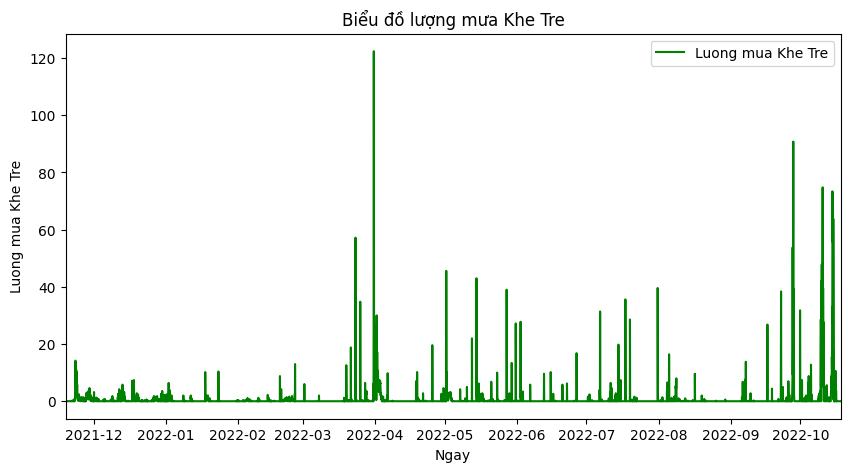

In [ ]:
# Tạo đồ thị lượng mưa Khe Tre
pyplot.figure(figsize=(10, 5))
pyplot.plot(df['Ngay'], df['Luong mua Khe Tre'], label='Luong mua Khe Tre', color='green')
pyplot.xlabel('Ngay')
pyplot.ylabel('Luong mua Khe Tre')
pyplot.title('Biểu đồ lượng mưa Khe Tre')
pyplot.legend(loc='best')
pyplot.xlim(df['Ngay'].iloc[0], df['Ngay'].iloc[8000])

(18950.0, 19283.333333333332)

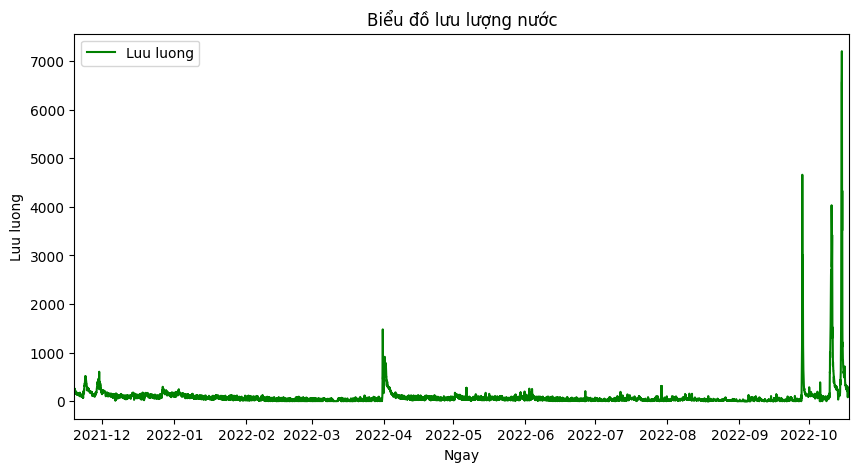

In [ ]:
# Tạo đồ thị lưu lượng nước
pyplot.figure(figsize=(10, 5))
pyplot.plot(df['Ngay'], df['Luu luong'], label='Luu luong', color='green')
pyplot.xlabel('Ngay')
pyplot.ylabel('Luu luong')
pyplot.title('Biểu đồ lưu lượng nước')
pyplot.legend(loc='best')
pyplot.xlim(df['Ngay'].iloc[0], df['Ngay'].iloc[8000])

# Bước 5: Chuẩn bị dữ liệu

In [ ]:
# Chuẩn bị dữ liệu
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Ngay','Luong mua Thuong Nhat','Luong mua Khe Tre','Luu luong'])

for i in range(0, len(data)):
    new_dataset["Ngay"][i] = data["Ngay"][i]
    new_dataset["Luong mua Thuong Nhat"][i] = data["Luong mua Thuong Nhat"][i]
    new_dataset["Luong mua Khe Tre"][i] = data["Luong mua Khe Tre"][i]
    new_dataset["Luu luong"][i] = data["Luu luong"][i]

new_dataset.index = new_dataset.Ngay
new_dataset.drop("Ngay", axis=1, inplace=True)



In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = DataFrame(data)
    cols, names = list(), list()

    # Tạo chuỗi input (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # Tạo chuỗi forecast (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # Ghép các chuỗi lại với nhau
    agg = concat(cols, axis=1)
    agg.columns = names

    # Loại bỏ các dòng có giá trị NaN
    if dropnan:
        agg.dropna(inplace=True)

    return agg


In [ ]:
values = new_dataset.values

# hướng mã hóa số nguyên
encoder = LabelEncoder()
values[:, 1] = encoder.fit_transform(values[:, 1])
#values = values.astype('float32')
#chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Khung như học tập được giám sát với độ trễ 1h
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
# drop columns we don't want to predict
reframed.drop(reframed.columns[[3,4]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)   var3(t)
1   0.000000   0.014599   0.032310  0.036404
2   0.000000   0.007299   0.036404  0.032020
3   0.002183   0.021898   0.032020  0.033901
4   0.013100   0.000000   0.033901  0.031083
5   0.006550   0.007299   0.031083  0.031084


In [ ]:
values = reframed.values
#chia tập dữ liệu train và test
n_train_hours = 273 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(6552, 1, 3) (6552,) (1663, 1, 3) (1663,)


# Bước 6: Xây dựng và huấn luyện mô hình

Epoch 1/20
94/94 - 4s - loss: 0.0052 - val_loss: 0.0219 - 4s/epoch - 45ms/step
Epoch 2/20
94/94 - 0s - loss: 0.0051 - val_loss: 0.0206 - 438ms/epoch - 5ms/step
Epoch 3/20
94/94 - 0s - loss: 0.0049 - val_loss: 0.0195 - 441ms/epoch - 5ms/step
Epoch 4/20
94/94 - 0s - loss: 0.0047 - val_loss: 0.0186 - 376ms/epoch - 4ms/step
Epoch 5/20
94/94 - 0s - loss: 0.0046 - val_loss: 0.0177 - 296ms/epoch - 3ms/step
Epoch 6/20
94/94 - 0s - loss: 0.0044 - val_loss: 0.0168 - 309ms/epoch - 3ms/step
Epoch 7/20
94/94 - 0s - loss: 0.0043 - val_loss: 0.0160 - 306ms/epoch - 3ms/step
Epoch 8/20
94/94 - 0s - loss: 0.0042 - val_loss: 0.0151 - 320ms/epoch - 3ms/step
Epoch 9/20
94/94 - 0s - loss: 0.0040 - val_loss: 0.0144 - 285ms/epoch - 3ms/step
Epoch 10/20
94/94 - 0s - loss: 0.0039 - val_loss: 0.0135 - 307ms/epoch - 3ms/step
Epoch 11/20
94/94 - 0s - loss: 0.0038 - val_loss: 0.0127 - 346ms/epoch - 4ms/step
Epoch 12/20
94/94 - 0s - loss: 0.0036 - val_loss: 0.0118 - 307ms/epoch - 3ms/step
Epoch 13/20
94/94 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


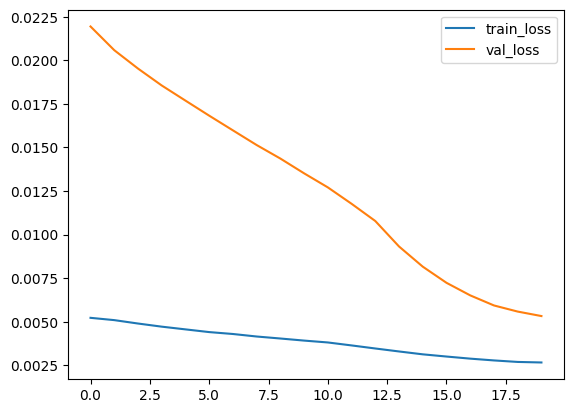

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')
# fit network
history = lstm_model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
lstm_model.save("drive/MyDrive/data/saved_lstm_model.h5")
# plot history
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

Epoch 1/50
91/91 - 2s - loss: 1.5981e-04 - val_loss: 0.0060 - 2s/epoch - 27ms/step
Epoch 2/50
91/91 - 0s - loss: 1.0834e-04 - val_loss: 0.0051 - 275ms/epoch - 3ms/step
Epoch 3/50
91/91 - 0s - loss: 9.2516e-05 - val_loss: 0.0046 - 313ms/epoch - 3ms/step
Epoch 4/50
91/91 - 0s - loss: 8.1427e-05 - val_loss: 0.0041 - 434ms/epoch - 5ms/step
Epoch 5/50
91/91 - 0s - loss: 7.2444e-05 - val_loss: 0.0037 - 284ms/epoch - 3ms/step
Epoch 6/50
91/91 - 0s - loss: 6.4765e-05 - val_loss: 0.0033 - 275ms/epoch - 3ms/step
Epoch 7/50
91/91 - 0s - loss: 5.8030e-05 - val_loss: 0.0029 - 348ms/epoch - 4ms/step
Epoch 8/50
91/91 - 0s - loss: 5.2045e-05 - val_loss: 0.0025 - 394ms/epoch - 4ms/step
Epoch 9/50
91/91 - 1s - loss: 4.6717e-05 - val_loss: 0.0022 - 738ms/epoch - 8ms/step
Epoch 10/50
91/91 - 1s - loss: 4.2007e-05 - val_loss: 0.0020 - 1s/epoch - 12ms/step
Epoch 11/50
91/91 - 1s - loss: 3.7900e-05 - val_loss: 0.0017 - 725ms/epoch - 8ms/step
Epoch 12/50
91/91 - 0s - loss: 3.4377e-05 - val_loss: 0.0015 - 387m

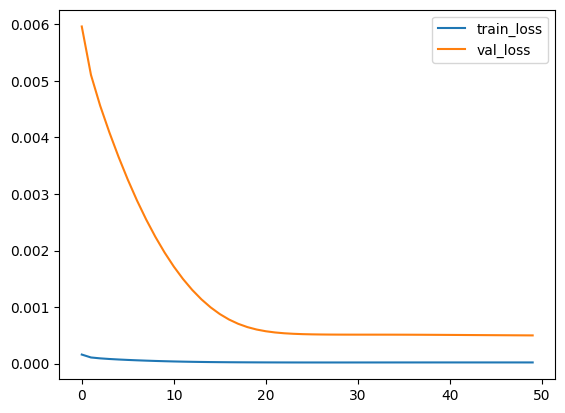

In [ ]:
#xây dựng mô hình GRU
gru_model = Sequential()
gru_model.add(GRU(units=50, input_shape=(train_X.shape[1], train_X.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
#huấn luyện mô hình GRU
history1 = gru_model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y),
                         verbose=2, shuffle=False)
gru_model.save("drive/MyDrive/new_data/saved_gru_model.h5")
# plot history
pyplot.plot(history1.history['loss'], label='train_loss')
pyplot.plot(history1.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

Epoch 1/50
91/91 - 10s - loss: 1.1807e-04 - val_loss: 0.0065 - 10s/epoch - 106ms/step
Epoch 2/50
91/91 - 1s - loss: 1.0355e-04 - val_loss: 0.0063 - 549ms/epoch - 6ms/step
Epoch 3/50
91/91 - 1s - loss: 1.0052e-04 - val_loss: 0.0061 - 522ms/epoch - 6ms/step
Epoch 4/50
91/91 - 1s - loss: 9.7846e-05 - val_loss: 0.0060 - 533ms/epoch - 6ms/step
Epoch 5/50
91/91 - 1s - loss: 9.6002e-05 - val_loss: 0.0059 - 524ms/epoch - 6ms/step
Epoch 6/50
91/91 - 1s - loss: 9.4794e-05 - val_loss: 0.0058 - 523ms/epoch - 6ms/step
Epoch 7/50
91/91 - 1s - loss: 9.3879e-05 - val_loss: 0.0057 - 508ms/epoch - 6ms/step
Epoch 8/50
91/91 - 1s - loss: 9.3317e-05 - val_loss: 0.0056 - 513ms/epoch - 6ms/step
Epoch 9/50
91/91 - 1s - loss: 9.2917e-05 - val_loss: 0.0055 - 535ms/epoch - 6ms/step
Epoch 10/50
91/91 - 1s - loss: 9.2409e-05 - val_loss: 0.0054 - 602ms/epoch - 7ms/step
Epoch 11/50
91/91 - 1s - loss: 9.1813e-05 - val_loss: 0.0053 - 869ms/epoch - 10ms/step
Epoch 12/50
91/91 - 1s - loss: 9.0757e-05 - val_loss: 0.0052 

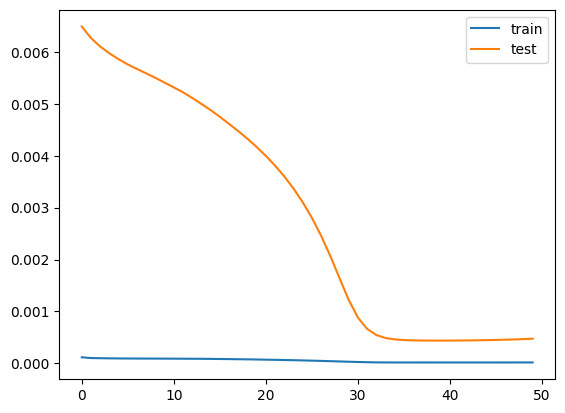

In [ ]:
from keras.layers import Bidirectional
# Khởi tạo mô hình
bi_lstm_model = Sequential()
# Thêm lớp LSTM kép (Bidirectional LSTM)
bi_lstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
bi_lstm_model.add(Bidirectional(LSTM(units=50)))
# Thêm lớp fully connected
bi_lstm_model.add(Dense(1))
# Biên dịch mô hình
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history2 = bi_lstm_model.fit(train_X, train_y, epochs=50, batch_size=72,validation_data=(test_X, test_y),
                             verbose=2, shuffle=False)
bi_lstm_model.save("drive/MyDrive/data/saved_bi_lstm_model.h5")
# plot history
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Bước 7: Dự đoán lưu lượng nước

In [ ]:
# dự đoán mô hình LSTM
y_lstm = lstm_model.predict(test_X)

52/52 [==============================] - 1s 2ms/step


In [ ]:
# dự đoán mô hình GRU
y_gru = gru_model.predict(test_X)

52/52 [==============================] - 0s 2ms/step


In [ ]:
# dự đoán mô hình Bi_LSTM
y_bilstm = bi_lstm_model.predict(test_X)

52/52 [==============================] - 2s 2ms/step


# Bước 8: Đánh giá mô hình

In [ ]:
test_X = test_X.reshape((test_X.shape[0], 3))
# invert scaling for forecast
inv_ylstm = np.concatenate((y_lstm, test_X[:, -2:]), axis=1)
inv_ylstm1 = scaler.inverse_transform(inv_ylstm)
inv_ylstm2 = inv_ylstm1[:,0]
# invert scaling for forecast
inv_ygru = np.concatenate((y_gru, test_X[:, -2:]), axis=1)
inv_ygru1 = scaler.inverse_transform(inv_ygru)
inv_ygru2 = inv_ygru1[:,0]
# invert scaling for forecast
inv_ybilstm = np.concatenate((y_bilstm, test_X[:, -2:]), axis=1)
inv_ybilstm1 = scaler.inverse_transform(inv_ybilstm)
inv_ybilstm2 = inv_ybilstm1[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y)
inv_y2 = inv_y1[:,0]


In [ ]:
# calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(inv_y2, inv_ylstm2))
rmse_gru = sqrt(mean_squared_error(inv_y2, inv_ygru2))
rmse_bilstm = sqrt(mean_squared_error(inv_y2, inv_ybilstm2))
print('Test RMSE: %.3f' % rmse_lstm)
print('Test RMSE: %.3f' % rmse_gru)
print('Test RMSE: %.3f' % rmse_bilstm)

Test RMSE: 1.848
Test RMSE: 2.045
Test RMSE: 1.998


In [ ]:
# đánh giá mô hình LSTM bằng MAE
mae_lstm = mean_absolute_error(inv_y2, inv_ylstm2)
# đánh giá mô hình GRU bằng MAE
mae_gru = mean_absolute_error(inv_y2, inv_ygru2)
# đánh giá mô hình Bi_LSTM bằng MAE
mae_bilstm = mean_absolute_error(inv_y2, inv_ybilstm2)
print('Test MAE_LSTM: %.6f' % mae_lstm)
print('Test MAE_GRU: %.6f' % mae_gru)
print('Test MAE_BiLSTM: %.6f' % mae_bilstm)

Test MAE_LSTM: 0.488380
Test MAE_GRU: 0.529891
Test MAE_BiLSTM: 0.568698


In [ ]:
mse_lstm = mean_squared_error(inv_y2, inv_ylstm2)
mse_gru = mean_squared_error(inv_y2, inv_ygru2)
mse_bilstm = mean_squared_error(inv_y2, inv_ybilstm2)
print('Test MSE_LSTM: %.6f' % mse_lstm)
print('Test MSE_GRU: %.6f' % mse_gru)
print('Test MSE_BiLSTM: %.6f' % mse_bilstm)

Test MSE_LSTM: 3.414504
Test MSE_GRU: 4.183110
Test MSE_BiLSTM: 3.992337


In [ ]:
r2_lstm = r2_score(inv_y2, inv_ylstm2)
r2_gru = r2_score(inv_y2, inv_ygru2)
r2_bilstm = r2_score(inv_y2, inv_ybilstm2)
print('Test R2_LSTM: %.6f' % r2_lstm)
print('Test R2_GRU: %.6f' % r2_gru)
print('Test R2_BiLSTM: %.6f' % r2_bilstm)

Test R2_LSTM: 0.941649
Test R2_GRU: 0.928514
Test R2_BiLSTM: 0.931775


In [ ]:
# @title Vẽ Biểu đồ


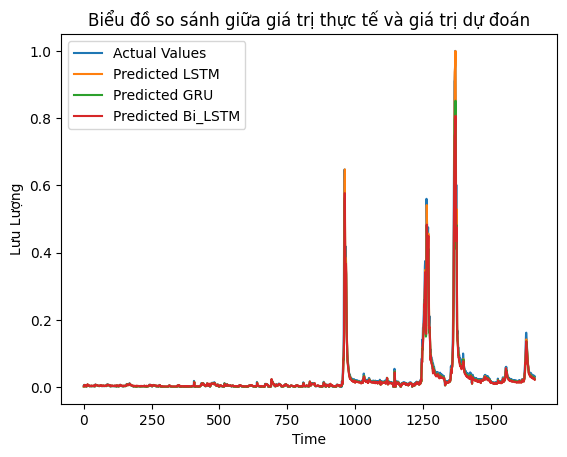

In [ ]:
#kết quả dự đoán , kết quả thực tế
# Vẽ biểu đồ so sánh
pyplot.plot(test_y, label='Actual Values')
pyplot.plot(y_lstm, label='Predicted LSTM')
pyplot.plot(y_gru, label='Predicted GRU')
pyplot.plot(y_bilstm, label='Predicted Bi_LSTM')
pyplot.title('Biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán')
pyplot.xlabel('Time')
pyplot.ylabel('Lưu Lượng')
pyplot.legend()
pyplot.show()

In [ ]:
q_thuc= inv_y2
qlstm_dubao= inv_ylstm2
qgru_dubao= inv_ygru2
qbilstm_dubao= inv_ybilstm2

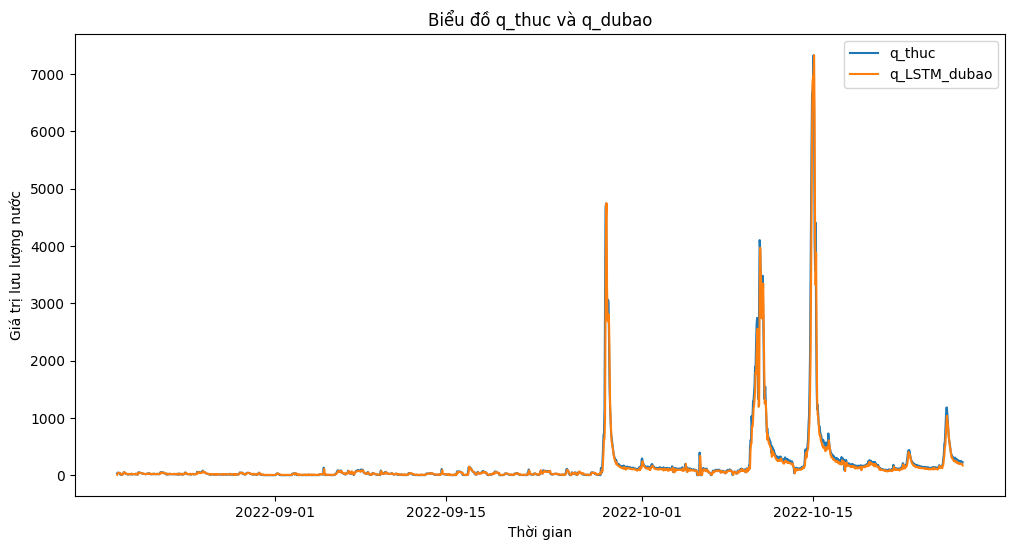

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ biểu đồ
df_np = dataset.iloc[6553:, :1].values
plt.figure(figsize=(12,6))  # Kích thước của biểu đồ
# Chọn thông tin ngày giờ từ df_np
x_values = df_np[:, 0]
# Vẽ biểu đồ q_thuc và q_dubao với trục x là ngày giờ từ df_np
pyplot.plot(x_values, q_thuc, label='q_thuc')  # Biểu đồ cho q_thuc
pyplot.plot(x_values, qlstm_dubao, label='q_LSTM_dubao')  # Biểu đồ cho q_dubao
pyplot.xlabel('Thời gian')  # Nhãn trục x
pyplot.ylabel('Giá trị lưu lượng nước')  # Nhãn trục y
pyplot.title('Biểu đồ q_thuc và q_dubao')  # Tiêu đề biểu đồ
pyplot.legend()  # Hiển thị chú thích
pyplot.show()  # Hiển thị biểu đồ


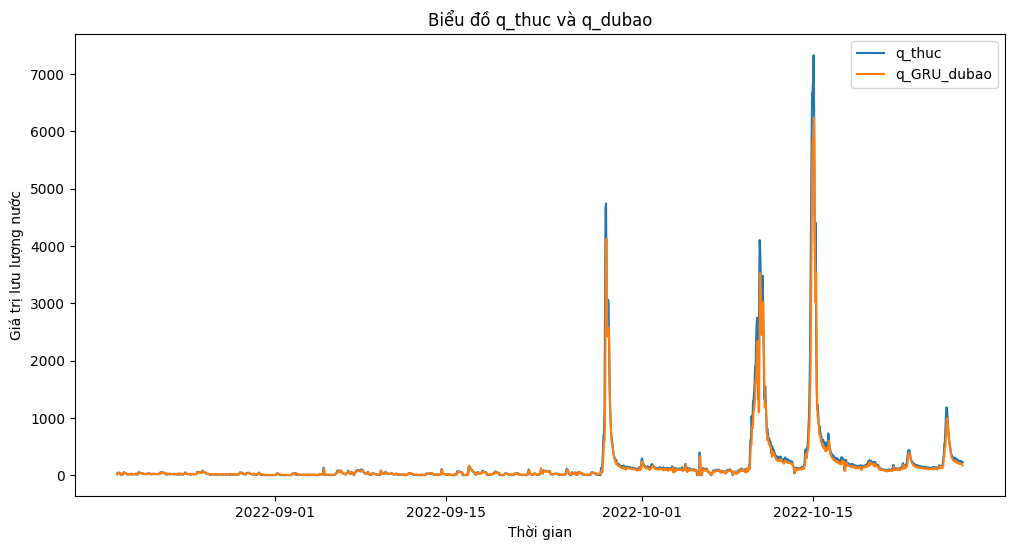

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ biểu đồ
plt.figure(figsize=(12,6))  # Kích thước của biểu đồ
# Chọn thông tin ngày giờ từ df_np
x_values = df_np[:, 0]
# Vẽ biểu đồ q_thuc và q_dubao với trục x là ngày giờ từ df_np
pyplot.plot(x_values, q_thuc, label='q_thuc')  # Biểu đồ cho q_thuc
pyplot.plot(x_values, qgru_dubao, label='q_GRU_dubao')  # Biểu đồ cho q_dubao
pyplot.xlabel('Thời gian')  # Nhãn trục x
pyplot.ylabel('Giá trị lưu lượng nước')  # Nhãn trục y
pyplot.title('Biểu đồ q_thuc và q_dubao')  # Tiêu đề biểu đồ
pyplot.legend()  # Hiển thị chú thích
pyplot.show()  # Hiển thị biểu đồ

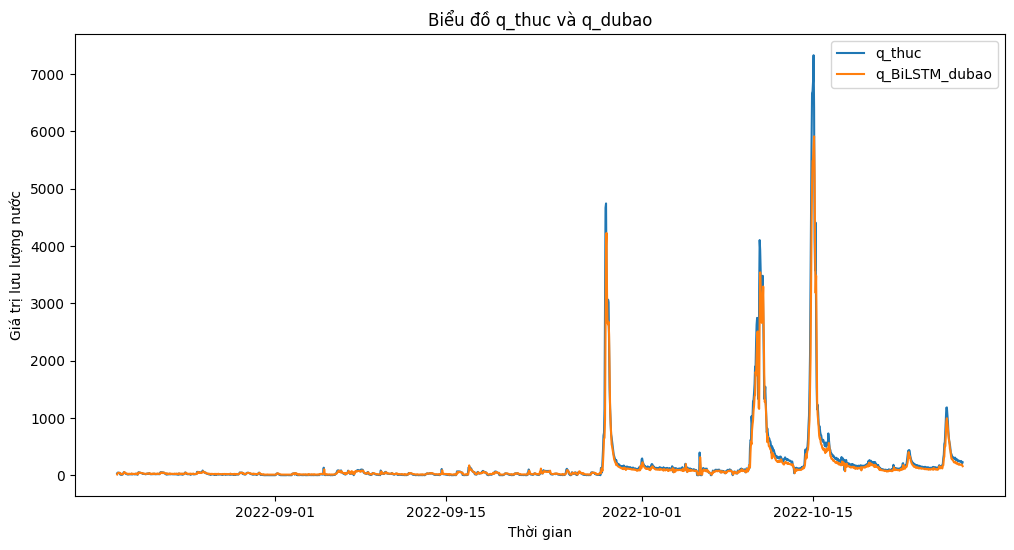

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ biểu đồ
plt.figure(figsize=(12,6 ))  # Kích thước của biểu đồ
# Chọn thông tin ngày giờ từ df_np
x_values = df_np[:, 0]
# Vẽ biểu đồ q_thuc và q_dubao với trục x là ngày giờ từ df_np
plt.plot(x_values, q_thuc, label='q_thuc')  # Biểu đồ cho q_thuc
#plt.plot(x_values, qlstm_dubao, label='q_LSTM_dubao')  # Biểu đồ cho q_dubao
#plt.plot(x_values, qgru_dubao, label='q_GRU_dubao')  # Biểu đồ cho q_dubao
pyplot.plot(x_values, qbilstm_dubao, label='q_BiLSTM_dubao')  # Biểu đồ cho q_dubao
pyplot.xlabel('Thời gian')  # Nhãn trục x
pyplot.ylabel('Giá trị lưu lượng nước')  # Nhãn trục y
pyplot.title('Biểu đồ q_thuc và q_dubao')  # Tiêu đề biểu đồ
pyplot.legend()  # Hiển thị chú thích
pyplot.show()  # Hiển thị biểu đồ


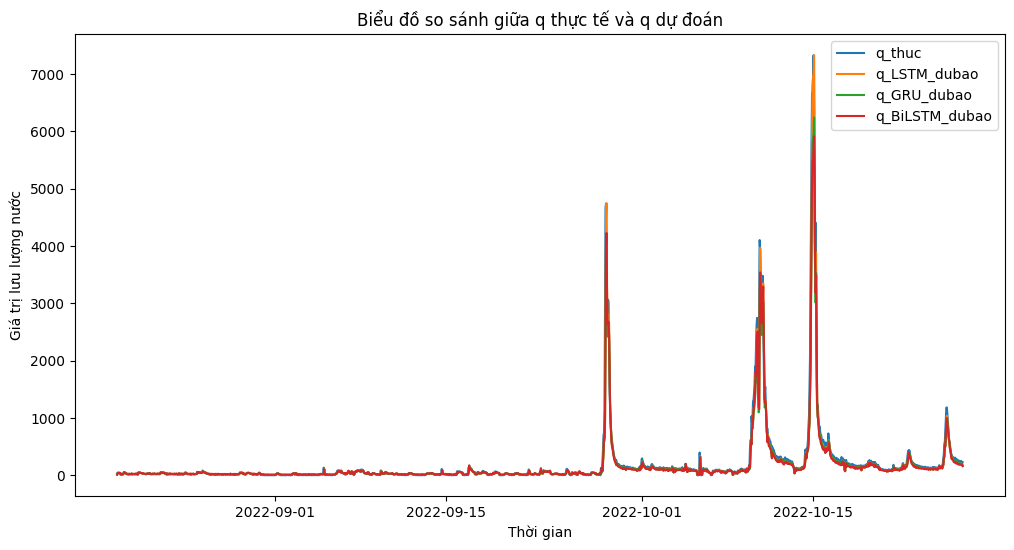

In [ ]:
# Vẽ biểu đồ
pyplot.figure(figsize=(12,6))  # Kích thước của biểu đồ
# Chọn thông tin ngày giờ từ df_np
x_values = df_np[:, 0]
# Vẽ biểu đồ q_thuc và q_dubao với trục x là ngày giờ từ df_np
pyplot.plot(x_values, q_thuc, label='q_thuc')  # Biểu đồ cho q_thuc
pyplot.plot(x_values, qlstm_dubao, label='q_LSTM_dubao')  # Biểu đồ cho q_dubao
pyplot.plot(x_values, qgru_dubao, label='q_GRU_dubao')  # Biểu đồ cho q_dubao
pyplot.plot(x_values, qbilstm_dubao, label='q_BiLSTM_dubao')  # Biểu đồ cho q_dubao
pyplot.xlabel('Thời gian')  # Nhãn trục x
pyplot.ylabel('Giá trị lưu lượng nước')  # Nhãn trục y
pyplot.title('Biểu đồ so sánh giữa q thực tế và q dự đoán')  # Tiêu đề biểu đồ
pyplot.legend()  # Hiển thị chú thích
pyplot.show()  # Hiển thị biểu đồ
